In [3]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [41]:
# Datos (Selling_Price en USD, Present_Price en USD)
data1 = {
    'Selling_Price': [3.35, 4.75, 7.25, 2.85, 4.6, 9.25, 6.75, 6.5, 8.75, 7.45, 2.85, 6.85, 7.5, 6.1, 2.25, 7.75, 7.25, 7.75, 3.25, 2.65, 2.85, 4.9, 4.4, 2.5, 2.9, 3, 4.15, 6, 1.95, 7.45, 3.1, 2.35, 4.95, 6, 5.5, 2.95, 4.65, 0.35, 3, 2.25, 5.85, 2.55, 1.95, 5.5, 1.25, 7.5, 2.65, 1.05, 5.8, 7.75, 14.9, 23, 18, 16, 2.75, 3.6, 4.5, 4.75, 4.1, 19.99, 6.95, 4.5, 18.75, 23.5, 33, 4.75, 19.75, 9.25, 4.35, 14.25, 3.95, 4.5, 7.45, 2.65, 4.9, 3.95, 5.5, 1.5, 5.25, 14.5, 14.73, 4.75, 23, 12.5, 3.49, 2.5, 35, 5.9, 3.45, 4.75, 3.8, 11.25, 3.51, 23, 4, 5.85, 20.75, 17, 7.05, 9.65, 1.75, 1.7, 1.65, 1.45, 1.35, 1.35, 1.35, 1.25, 1.2, 1.2, 1.2, 1.15, 1.15, 1.15, 1.15, 1.11, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.05, 1, 0.95, 0.9, 0.9, 0.75, 0.8, 0.78, 0.75, 0.75, 0.75, 0.72, 0.65, 0.65, 0.65, 0.65, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.55, 0.55, 0.52, 0.51, 0.5, 0.5, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.42, 0.42, 0.4, 0.4, 0.4, 0.4, 0.4, 0.38, 0.38, 0.35, 0.35, 0.35, 0.31, 0.3, 0.3, 0.3, 0.27, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.18, 0.17, 0.16, 0.15, 0.12, 0.1, 3.25, 4.4, 2.95, 2.75, 5.25, 5.75, 5.15, 7.9, 4.85, 3.1, 11.75, 11.25, 2.9, 5.25, 4.5, 2.9, 3.15, 6.45, 4.5, 3.5, 4.5, 6, 8.25, 5.11, 2.7, 5.25, 2.55, 4.95, 3.1, 6.15, 9.25, 11.45, 3.9, 5.5, 9.1, 3.1, 11.25, 4.8, 2, 5.35, 4.75, 4.4, 6.25, 5.95, 5.2, 3.75, 5.95, 4, 5.25, 12.9, 5, 5.4, 7.2, 5.25, 3, 10.25, 8.5, 8.4, 3.9, 9.15, 5.5, 4, 6.6, 4, 6.5, 3.65, 8.35, 4.8, 6.7, 4.1, 3, 7.5, 2.25, 5.3, 10.9, 8.65, 9.7, 6, 6.25, 5.25, 2.1, 8.25, 8.99, 3.5, 7.4, 5.65, 5.75, 8.4, 10.11, 4.5, 5.4, 6.4, 3.25, 3.75, 8.55, 9.5, 4, 3.35, 11.5, 5.3
],
    'Present_Price': [5.59, 9.54, 9.85, 4.15, 6.87, 9.83, 8.12, 8.61, 8.89, 8.92, 3.6, 10.38, 9.94, 7.71, 7.21, 10.79, 10.79, 10.79, 5.09, 7.98, 3.95, 5.71, 8.01, 3.46, 4.41, 4.99, 5.87, 6.49, 3.95, 10.38, 5.98, 4.89, 7.49, 9.95, 8.06, 7.74, 7.2, 2.28, 3.76, 7.98, 7.87, 3.98, 7.15, 8.06, 2.69, 12.04, 4.89, 4.15, 7.71, 9.29, 30.61, 30.61, 19.77, 30.61, 10.21, 15.04, 7.27, 18.54, 6.8, 35.96, 18.61, 7.7, 35.96, 35.96, 36.23, 6.95, 23.15, 20.45, 13.74, 20.91, 6.76, 12.48, 18.61, 5.71, 8.93, 6.8, 14.68, 12.35, 22.83, 30.61, 14.89, 7.85, 25.39, 13.46, 13.46, 23.73, 92.6, 13.74, 6.05, 6.76, 18.61, 16.09, 13.7, 30.61, 22.78, 18.61, 25.39, 18.64, 18.61, 20.45, 1.9, 1.82, 1.78, 1.6, 1.47, 2.37, 3.45, 1.5, 1.5, 1.47, 1.78, 1.5, 2.4, 1.4, 1.47, 1.47, 1.47, 1.9, 1.47, 1.9, 1.26, 1.5, 1.17, 1.47, 1.75, 1.75, 0.95, 0.8, 0.87, 0.84, 0.87, 0.82, 0.95, 0.95, 0.81, 0.74, 1.2, 0.787, 0.87, 0.95, 1.2, 0.8, 0.84, 0.84, 0.99, 0.81, 0.787, 0.84, 0.94, 0.94, 0.826, 0.55, 0.99, 0.99, 0.88, 0.51, 0.52, 0.84, 0.54, 0.51, 0.95, 0.826, 0.99, 0.95, 0.54, 0.54, 0.55, 0.81, 0.73, 0.54, 0.83, 0.55, 0.64, 0.51, 0.72, 0.787, 1.05, 0.57, 0.52, 1.05, 0.51, 0.48, 0.58, 0.47, 0.75, 0.58, 0.52, 0.51, 0.57, 0.57, 0.75, 0.57, 0.75, 0.65, 0.787, 0.32, 0.52, 0.51, 0.57, 0.58, 0.75, 6.79, 5.7, 4.6, 4.43, 5.7, 7.13, 5.7, 8.1, 5.7, 4.6, 14.79, 13.6, 6.79, 5.7, 9.4, 4.43, 4.43, 9.4, 9.4, 4.43, 6.79, 7.6, 9.4, 9.4, 4.6, 5.7, 4.43, 9.4, 6.79, 9.4, 9.4, 14.79, 5.7, 5.7, 9.4, 4.43, 13.6, 9.4, 4.43, 9.4, 7.13, 7.13, 7.6, 9.4, 9.4, 6.79, 9.4, 4.6, 7.6, 13.6, 9.9, 6.82, 9.9, 9.9, 5.35, 13.6, 13.6, 13.6, 7, 13.6, 5.97, 5.8, 7.7, 7, 8.7, 7, 9.4, 5.8, 10, 10, 10, 10, 7.5, 6.8, 13.6, 13.6, 13.6, 8.4, 13.6, 5.9, 7.6, 14, 11.8, 5.9, 8.5, 7.9, 7.5, 13.6, 13.6, 6.4, 6.1, 8.4, 9.9, 6.8, 13.09, 11.6, 5.9, 11, 12.5, 5.9
]
    
}

Intercepto (β0): 0.6605470242490412
Coeficiente (Selling_Price, β1): [1.49484719]


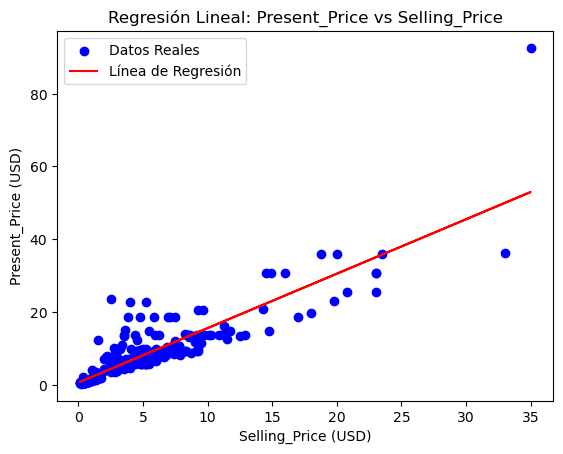

In [45]:
# Convertir los datos en un DataFrame
df = pd.DataFrame(data1)

# Variables independientes (Selling_Price) y dependiente (Present_Price)
X = df[['Selling_Price']]
y = df['Present_Price']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes (Selling_Price)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Selling_Price, β1): {beta_1}")

# Visualizar la regresión (opcional para datos simples)
plt.scatter(df['Selling_Price'], y, color='blue', label='Datos Reales')
plt.plot(df['Selling_Price'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Present_Price vs Selling_Price')
plt.xlabel('Selling_Price (USD)')
plt.ylabel('Present_Price (USD)')
plt.legend()
plt.show()

In [51]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[3.45], [4.50]])  # Nuevos valores (Selling_Price)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Selling_Price: {nuevo_X[i][0]} USD): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Selling_Price: 3.45 USD): 5.82 USD
Predicción 2 para (Selling_Price: 4.5 USD): 7.39 USD


C:\Users\Oconer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [101]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datos (suponiendo que tienes el dataset con 30 ejemplos de Present_Price y Present_Price)
# Por ejemplo, los datos se pueden construir como arrays o un DataFrame

X = df[['Selling_Price']]
y = df['Present_Price']

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
predicciones = model.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')


R² (Coeficiente de determinación): 0.7726103146985799
Error Absoluto Medio (MAE): 2.2022108956273114
